## <center>Mayhem at DinoFun World Visitor Communication: Exploratory Data Analysis</center>

## <center>Submitted By</center>

## <center>Ben Karabinus</center>

## <center>University of Denver</center>

## <center> Ritchie School of Engineering and Computer Science</center>

## <center>COMP 4449, Data Science Capstone</center>

## <center>Fall Quarter 2022</center>

In [126]:
"""read in required libraries"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as communities
from community import community_louvain

## __Exploratory Data Analysis__

*Objectives*

- Read in communications data for each of the provided days (Friday, Saturday, Sunday).
    - Check for null values.
    - Check for duplicate records.
    - Check that features are typed appropriately.
    - Check for inconsistent values in the data.
    - Handle any inconsistencies appropriately.
- Print unique park locations existing in the communications data.
- Explore ID' ("from" and to "columns")
    - Determine number of unique ID's in the data.
        - Determine unique ID's on a day by day basis.
        - Determine the number of unique ID's in the entire dataset
        - Determine the number of unique senders
        - Determine the number of unique receivers
    - Determine if any visitors communicated over multiple days.
    - Analyze senders and receivers
        - Identify number of senders who did not receive a message.
        - Identify number of receivers who did not send a message (excluding external users).
- Sender and receiver numeric analysis

- Graph analysis
    - Create a network graph of sender and receiver data.
    - Apply Louvain algorithm to identify sender receiver communities in the data
    

### Read in the communication data for each of the provided days.

In [83]:
"""read in the three data sets"""

# Friday
friday = pd.read_csv('../ProvidedData/comm-data-Fri.csv')
# Saturday
saturday = pd.read_csv('../ProvidedData/comm-data-Sat.csv')
# Sunday
sunday = pd.read_csv('../ProvidedData/comm-data-Sun.csv')

Check for null values.

In [84]:
"""Check for null  values in friday"""

friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948739 entries, 0 to 948738
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Timestamp  948739 non-null  object
 1   from       948739 non-null  int64 
 2   to         948739 non-null  object
 3   location   948739 non-null  object
dtypes: int64(1), object(3)
memory usage: 29.0+ MB


In [85]:
"""check for  null values in saturday"""

saturday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655866 entries, 0 to 1655865
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Timestamp  1655866 non-null  object
 1   from       1655866 non-null  int64 
 2   to         1655866 non-null  object
 3   location   1655866 non-null  object
dtypes: int64(1), object(3)
memory usage: 50.5+ MB


In [86]:
"""chek for null values in sunday"""

sunday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548724 entries, 0 to 1548723
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Timestamp  1548724 non-null  object
 1   from       1548724 non-null  int64 
 2   to         1548724 non-null  object
 3   location   1548724 non-null  object
dtypes: int64(1), object(3)
memory usage: 47.3+ MB


No null values were identified in the data.

### Check for duplicate records in the data.

In [87]:
"""check for duplicates in friday"""

friday.duplicated().sum()

61

In [88]:
"""examine duplicates for friday"""

friday[friday.duplicated()]

,Timestamp,from,to,location
11815,2014-6-06 08:40:26,1049061,20967,Wet Land
193603,2014-6-06 12:00:01,1198534,1124046,Kiddie Land
237442,2014-6-06 12:31:54,152338,1763715,Tundra Land
237443,2014-6-06 12:31:54,152338,427493,Tundra Land
237444,2014-6-06 12:31:54,152338,179142,Tundra Land
...,...,...,...,...
943132,2014-6-06 22:32:03,98371,203445,Kiddie Land
943133,2014-6-06 22:32:03,98371,140461,Kiddie Land
943134,2014-6-06 22:32:03,98371,1494697,Kiddie Land
943135,2014-6-06 22:32:03,98371,209832,Kiddie Land


In [89]:
"""check if Creighton Pavillion is in the data"""

sunday['location'].unique()

array(['Kiddie Land', 'Entry Corridor', 'Tundra Land', 'Wet Land',
       'Coaster Alley'], dtype=object)

In [90]:
"""check for duplicates in saturday"""

saturday.duplicated().sum()

15

In [91]:
"""examine duplicates in saturday"""

saturday[saturday.duplicated()]

,Timestamp,from,to,location
89387,2014-6-07 09:37:27,64304,1687201,Tundra Land
89388,2014-6-07 09:37:27,64304,1713404,Tundra Land
312036,2014-6-07 11:45:25,1022105,1896855,Wet Land
345446,2014-6-07 12:00:30,133576,1772541,Wet Land
345454,2014-6-07 12:00:30,133576,1791065,Wet Land
998310,2014-6-07 16:57:36,587358,565854,Wet Land
998311,2014-6-07 16:57:36,587358,1431907,Wet Land
998312,2014-6-07 16:57:36,587358,1257219,Wet Land
998313,2014-6-07 16:57:36,587358,1446327,Wet Land
1035170,2014-6-07 17:15:32,1660523,1346096,Coaster Alley


In [92]:
"""check duplicates for sunday"""

sunday.duplicated().sum()

1181

In [93]:
"""examine duplicates for sunday"""

sunday[sunday.duplicated()]

,Timestamp,from,to,location
16478,2014-6-08 08:42:01,782954,1456070,Coaster Alley
140955,2014-6-08 10:29:11,549795,216468,Wet Land
140956,2014-6-08 10:29:11,549795,2013854,Wet Land
140957,2014-6-08 10:29:11,549795,495857,Wet Land
140958,2014-6-08 10:29:11,549795,417142,Wet Land
...,...,...,...,...
815147,2014-6-08 15:37:22,839736,636823,Entry Corridor
977685,2014-6-08 16:51:34,2067135,1745381,Wet Land
1269701,2014-6-08 19:10:49,839736,1376135,Entry Corridor
1347717,2014-6-08 19:51:09,231019,739587,Wet Land


Its worth considering what these duplicate records actually mean? There are numerous possibilities why the combination of [Timestamp,  from, to, location] might produce duplicate records. One such possibility is that users of the park application are involved in  the same  group messaging thread, but are texting each other individually too.

### Check that features are typed appropriately.

In [94]:
"""check data types for Friday"""

friday.dtypes

Timestamp    object
from          int64
to           object
location     object
dtype: object

In [95]:
"""check data types for saturday"""

saturday.dtypes

Timestamp    object
from          int64
to           object
location     object
dtype: object

In [96]:
"""check data types for sunday"""

sunday.dtypes

Timestamp    object
from          int64
to           object
location     object
dtype: object

Printing data types for the friday, saturday, and sunday datasets shows the "Timestamp" column is  not appropriately typed. This column will be converted to type datetime64. The "from" column was read in as an integer type while the "to" column was brought in as an object. This is a result of the "to" column containing the value  "external" this is a  valid value indicating  communication with someone outside of DinoFun world. To ensure the same typing the "from" column will transformed to type object (string).

In [97]:
"""conver the Timestamp column to datetime format in friday, saturday, and sunday"""

#  convert the timestamp column
friday['Timestamp'] = pd.to_datetime(friday['Timestamp'])
saturday['Timestamp'] = pd.to_datetime(saturday['Timestamp'])
sunday['Timestamp'] = pd.to_datetime(sunday['Timestamp'])
#vrify  type change
print(friday.dtypes)
print(saturday.dtypes)
print(sunday.dtypes)

Timestamp    datetime64[ns]
from                  int64
to                   object
location             object
dtype: object
Timestamp    datetime64[ns]
from                  int64
to                   object
location             object
dtype: object
Timestamp    datetime64[ns]
from                  int64
to                   object
location             object
dtype: object


In [98]:
"""convert from column to type object (string)"""

# convert column
friday =  friday.astype({'to':'object'})
saturday = saturday.astype({'to': 'object'})
sunday = sunday.astype({'to':'object'})

# verify conversion
print(friday.dtypes)
print(saturday.dtypes)
print(sunday.dtypes)

Timestamp    datetime64[ns]
from                  int64
to                   object
location             object
dtype: object
Timestamp    datetime64[ns]
from                  int64
to                   object
location             object
dtype: object
Timestamp    datetime64[ns]
from                  int64
to                   object
location             object
dtype: object


### Print  unique locations existing in the communications data.

In [99]:
"""print unique locations existing in communications data"""

# friday
print("Friday")
print(friday['location'].unique())
print("Saturday")
print(saturday['location'].unique())
print("Sunday")
print(sunday['location'].unique())

Friday
['Kiddie Land' 'Entry Corridor' 'Tundra Land' 'Wet Land' 'Coaster Alley']
Saturday
['Entry Corridor' 'Kiddie Land' 'Tundra Land' 'Coaster Alley' 'Wet Land']
Sunday
['Kiddie Land' 'Entry Corridor' 'Tundra Land' 'Wet Land' 'Coaster Alley']


Printing unique location values for each day of the weekend shows identical results, five unique locations (Kiddie Land, Entry Corridor, Tundra Land, Wet Land, Coaster Alley).

## Explore ID's ("from" and to "columns")

### How many unique ID's exist in the data?

In [100]:
"""determine unique ID's"""

num_users_fri = pd.concat([friday['from'], friday['to']]).nunique()
num_users_sat = pd.concat([saturday['from'], saturday['to']]).nunique()
num_users_sun = pd.concat([sunday['from'],sunday['to']]).nunique()
combined = pd.concat([friday, saturday, sunday])
all_id = pd.Series(pd.concat([combined['to'], combined['from']]).unique())
total_users = all_id.count()
print("The total number of communication app users on Friday was: ", num_users_fri)
print("The total number of communication app users on Saturday was: ", num_users_sat)
print("The total number of communication app users on Sunday was: ", num_users_sun)
print("The total number of communication app users for the entire weekend was: ", total_users)

The total number of communication app users on Friday was:  5876
The total number of communication app users on Saturday was:  10525
The total number of communication app users on Sunday was:  12158
The total number of communication app users for the entire weekend was:  18820


Determine the number of unique senders.

In [101]:
"""get unique senders for each day and whole weekend"""

# calculate unique senders
unique_senders_fri = friday['from'].nunique()
unique_senders_sat = saturday['from'].nunique()
unique_senders_sun = sunday['from'].nunique()
unique_senders_total = combined['from'].nunique()
# print values
print("The total number of unique senders on Friday was: ", unique_senders_fri)
print("The total number of unique senders on Saturday was: ", unique_senders_sat)
print("The total number of unique senders on Sunday was: ", unique_senders_sun)
print("The total number of unique senders was: ", unique_senders_total)

The total number of unique senders on Friday was:  2950
The total number of unique senders on Saturday was:  5297
The total number of unique senders on Sunday was:  6118
The total number of unique senders was:  9429


Determine the number of unique receivers.

In [102]:
# calculate unique receivers 
# (note this calculation does not account for the fact that all external receivers are labeled as "external")

unique_receivers_fri = friday['to'].nunique()
unique_receivers_sat = saturday['to'].nunique()
unique_receivers_sun = sunday['to'].nunique()
unique_receivers_total = combined['to'].nunique()
# print values
print("The total number of unique receivers on Friday was: ", unique_receivers_fri)
print("The total number of unique receivers on Saturday was: ", unique_receivers_sat)
print("The total number of unique receivers on Sunday was: ", unique_receivers_sun)
print("The total number of unique receivers was: ", unique_receivers_total)

The total number of unique receivers on Friday was:  2926
The total number of unique receivers on Saturday was:  5228
The total number of unique receivers on Sunday was:  6040
The total number of unique receivers was:  9391


Which users communicated over multiple days.

In [103]:
"""determine how many users communicated over multiple days"""

# get all unique users in each individual day
unique_users_fri = pd.Series(pd.concat([friday['from'], friday['to']]).unique())
unique_users_sat = pd.Series(pd.concat([saturday['from'], saturday['to']]).unique())
unique_users_sun = pd.Series(pd.concat([sunday['from'],sunday['to']]).unique())
# create the combined dataframe
combined_unique = pd.DataFrame(pd.concat([unique_users_fri, unique_users_sat, unique_users_sun]), columns=['unique_id'])
# filter ID of external receivers
combined_unique = combined_unique[combined_unique['unique_id'] != 'external']
# add column to indicate if users were active in the park on Friday
combined_unique['active_friday'] = combined_unique['unique_id'].apply(lambda x: True if (x in unique_users_fri.values) else False)
# add column to indicate if users were active in the park on Saturday
combined_unique['active_saturday'] = combined_unique['unique_id'].apply(lambda x: True if (x in unique_users_sat.values) else False)
# add column to indicate if users were active in the park on Sunday
combined_unique['active_sunday'] = combined_unique['unique_id'].apply(lambda x: True if (x in unique_users_sat.values) else False)

In [104]:
"""print the number of unique users who attended for multiple days"""

friday_saturday = combined_unique[(combined_unique['active_friday'] == True) & (combined_unique['active_saturday'] == True)].shape[0]
saturday_sunday = combined_unique[(combined_unique['active_saturday'] == True) & (combined_unique['active_sunday'] == True)].shape[0]
friday_saturday_sunday = saturday_sunday = combined_unique[(combined_unique['active_saturday'] == True) & (combined_unique['active_saturday']\
                                                            == True) & (combined_unique['active_sunday'] == True)].shape[0]
print("The total number of users who attended the park on Friday and Saturday was: ", friday_saturday)
print("The total number of users who attended the park on Saturday and Sunday was: ", saturday_sunday)
print("The total number of users who attended the park on Friday, Saturday and Sunday was: ", friday_saturday_sunday)

The total number of users who attended the park on Friday and Saturday was:  9910
The total number of users who attended the park on Saturday and Sunday was:  20229
The total number of users who attended the park on Friday, Saturday and Sunday was:  20229


## Analyze senders and receivers

Identify number of senders who did not receive a message.

In [105]:
"""find the number of senders who did not receive a message"""

# get the set of receivers and senders
senders_set = set(combined['from'].values)
receivers_set = set(combined['to'].values)
# find senders who did not receive
num_senders_no_receive = len(senders_set.difference(receivers_set))
print("The number of senders who did not receive any messages is: ", num_senders_no_receive)

The number of senders who did not receive any messages is:  9429


Identify number of receivers who did not send a message (excluding external users).

In [106]:
"""find the number of receivers that did not send a message"""

# get set of receivers and senders
receivers_no_external = set(combined[combined['to'] != 'external']['to'].values)
senders_set = set(combined['from'].values)
# find receivers who did not send
num_receivers_no_send = len(receivers_no_external.difference(senders_set))
print("The number of receivers who did not send a message is: ", num_senders_no_receive)

The number of receivers who did not send a message is:  9429


## Graph analysis

### Create a network graph of sender and receiver data.

In [118]:
"""create the graph of park app users"""

# test using a subset fo data
combined_min = combined[0:500]
combined_min.groupby(by=['from', 'to']).count()
# instantiate the graph object
user_network = nx.Graph()
# populate the graph using "combined" dataframe as edge list
user_network = nx.from_pandas_edgelist(combined, 'from', 'to')

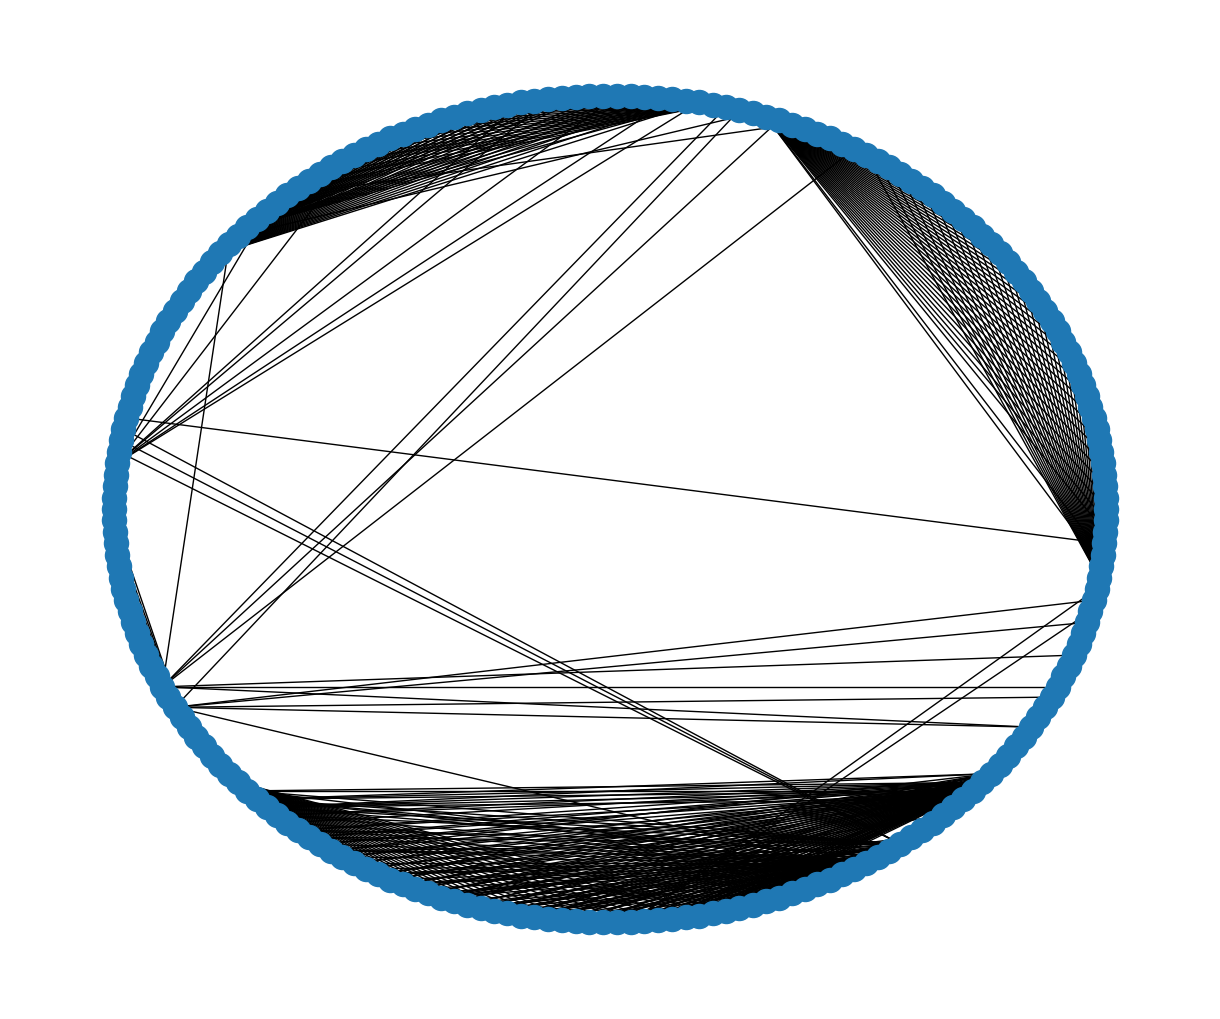

In [108]:
"""quick visualization of the graph"""

plt.figure(figsize=(12, 10))
nx.draw_shell(user_network)

In [130]:
"""create the graph"""

comms = communities.louvain_communities(user_network, seed=42, resolution=5)
comms

[{491520,
  '950729',
  622595,
  '1010409',
  1376266,
  1687565,
  1261583,
  655378,
  '478999',
  '1690009',
  409623,
  '2081799',
  '67425',
  '1965716',
  1867824,
  1523762,
  1540146,
  180277,
  '1552998',
  '736288',
  1491001,
  '1524807',
  475197,
  '1610139',
  1474620,
  '40960',
  '2070952',
  2015300,
  '1400270',
  327752,
  '2094112',
  '1377591',
  '2015331',
  '1897793',
  '404087',
  737363,
  442451,
  '1586280',
  '1890453',
  '162882',
  327763,
  1245273,
  '1298260',
  '669571',
  '1771428',
  573534,
  1605726,
  491616,
  '761614',
  1556578,
  '1281612',
  655459,
  '994721',
  2015331,
  '581500',
  '1620753',
  376940,
  1146988,
  1228908,
  '416171',
  508018,
  '388680',
  '1216859',
  671868,
  524412,
  '261886',
  '1190244',
  2064511,
  '1958692',
  '655378',
  1278084,
  '674984',
  '1373881',
  '1715563',
  '1025781',
  '1024520',
  1491083,
  '610790',
  1474703,
  '860426',
  '1657640',
  1835160,
  '412275',
  '579170',
  737440,
  2080929,


In [132]:
"""find the community size"""

comm_sizes = len([len(comm) for comm in comms])
comm_sizes

219